# Exercise 7: Fourier transformation 

*This notebook has been created by Julia Kukulies (julia.kukulies@gu.se) as a modified version from the exercise for GVN370 that has been created by Céline Heuzé.*



There are many processes that are periodic or near-periodic in the climate system, i.e. that come back
regularly. The day/night cycle in solar forcing, and the resulting day/night cycle in temperature, are
one of them. So is the seasonal cycle caused by the Earth’s tilt and rotation around the Sun, which
causes a seasonal cycle in tree growth, in sea ice, in snow, and in temperature again. On a longer term,
we saw one of these near-periodic processes in ex4: the El Niño Southern Oscillation. And in ex3, when
you used the time series of the NAO, you probably did not realise that it was another near-periodic
signal. At the other end of the time-space spectrum, if you ever work with turbulence, you will use
today’s method very often!

But what is today’s method? The **Fourier transform**, or how to obtain information about the main
periodicities in your signal.


I let you get more information using your favourite search engine (check videos even), but in a nutshell,
the idea behind a Fourier transform is that “any timeseries can be thought of as a sum of sinusoids of
different periods and different amplitudes”. A Fourier transform extracts these amplitudes and
periods; a Fourier spectrum is the plot of the amplitudes as a function of the periods. Large amplitude
at a specific period means that the signal has a periodicity there.

NB: in our field, we work with periods (diurnal, seasonal, yearly, 5-yearly etc). In signal processing and
remote sensing, people use frequencies rather (1 MHz, 3 GHz etc). The frequency is the inverse of the
period (1 Hz = 1 s$^{-1}$ ).


**In today’s session, you will:**

- **Produce the Fourier transform of a time series**
- **Identify leading variabilities on the Fourier spectrum**
- **Do some basic filtering to remove the high frequency variabilities.**


All that you need for today is one timeseries. I recommend you re-use the monthly sea surface
temperature in the East Pacific of ex4, as you are already familiar with its variabilities and kind of know
what to expect.


# Produce the Fourier transform of a timeseries 

As usual, import the python libraries you need and load your data. I will refer to my timeseries as sst_EP, which is the same East Pacific location from Ex.4. The last 3 values were NaN, so I removed them. When you do that you obtain a 1D array with 369 monthly values.




[This is an example of how to perform a Fourier transformation with Python and Numpy](https://pythontic.com/visualization/signals/fouriertransform_fft). [Or here is some additional help how to define the input parameters we need](https://medium.com/@khairulomar/deconstructing-time-series-using-fourier-transform-e52dd535a44e). 


Similar to the second example, we do:

In [178]:
# the sampling period (one month in seconds)
T = 30.25*24*3600

# sampling frequency 
Fs = 1/T

# length of signal = length of timeseries
L = np.size(sst_EP)

# frequency vector 
f = Fs*(np.arange(0, L/2))/ L

The Fourier transform (or Fast Fourier transform here, fft) is computed on this line. NOte that here you need to provide the input as a **numpy array** and not as an xarray, since the fft method is built for numpy data types. 


In [168]:
y_fft = np.fft.fft(sst_EP)

The returned variable y_fft is a complex. It has a real part and an imaginary part.
The real part is what contains the amplitude and frequency information.
The imaginary part contains the phase shift; that is not relevant for you unless you start working
with radar remote sensing raw data. Just be aware of these two components, which in Python are attritubes of the complex array:

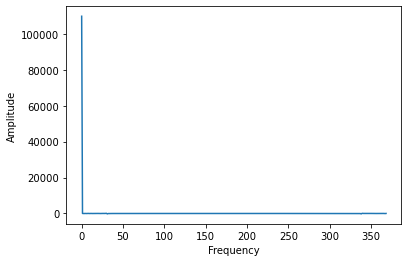

In [169]:
plt.plot(y_fft.real)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

So, we keep only the real part of y_fft. 

You have to divide by L because it is in the mathematical definition of the Fourier coefficients (the
amplitudes you want on your spectrum).

Finally, the fft is symmetrical around 0, so you need only keep half of P2 (but multiply by 2 to have
the right amount of energy):

In [170]:
P2 = np.abs(y_fft/L)
P1 = P2[0:np.size(f)] 

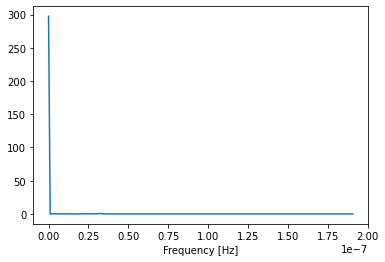

In [171]:
# plot P1 (the FFT) as a function of the freqency vector 
plt.plot(f,P1)
plt.xlabel('Frequency [Hz]')
plt.show()

It is not empty (yeah!), but I cannot interpret this. So let me replot it as a function of the period in
years rather:

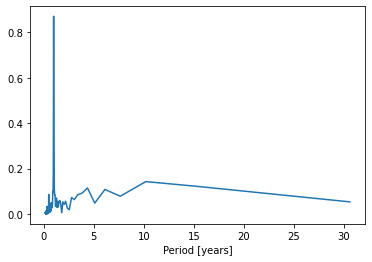

In [172]:
period = 1/f/(24*3600*365)
plt.plot(period, P1)
plt.xlabel('Period [years]')
plt.show()

As a rule of thumb, don’t trust periods that are over a third of your signal (10 years here), and definitely
don’t trust those over half (15 years), as there is just not enough data to determine the shape of the
sinusoid.

# Identify leading variables on the Fourier spectrum 

Zoom on the periods from 0 to 15 years then using plt.xlim(). I personally want to see more details, so I set one xtick per year and switched the grid on. This is how it looks like: 

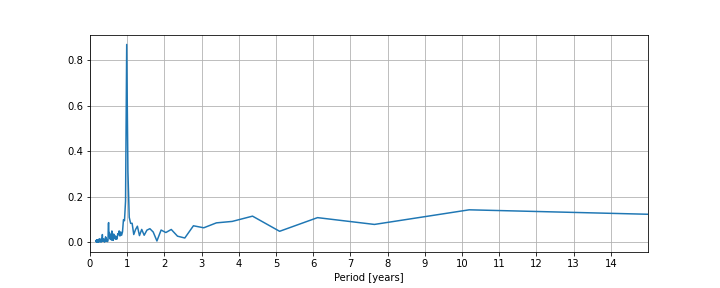

In [177]:
from PIL import Image
Image.open('fft.png')

What do YOU see?

Help with the interpretation:
- The variability that dominates the signal is the one that has the largest value. Here, it is at a 1
year period (the seasonal cycle);
- The other large values are around 4.5 years, 6 years, and 6 months.
- The narrower the peak, the more regular this periodicity is. So the seasonal cycle really comes
back exactly every year, whereas whatever is happening at 4.5 years is not that regular, and
instead is “spread” over other periodicities between 3 and 4.5 years.
- The peak at 6 months is an echo of the seasonal cycle, i.e. things that change once a year
because of the seasonal cycle have a noticeable change every 6 months. Ignore it.


Calculating the signal-to-noise ratio is beyond the scope of this course and is actually not that well
defined. It is often up to your own judgement to decide whether something is a peak or just noise.


Do a bit of research or use your own knowledge: what has a periodicity of 6-7 years? What about 4.5
years?


Think already before we move to the next part: the seasonal cycle dominates the signal and prevents
us from further studying the other variabilities. How would you remove it?

# Do some basic filtering to remove the high frequency variabilities

I am not going to lie to you: if you have never had a course on the maths behind signal processing, I
do not see how you would manage to design a filter in the few minutes we have left.
For now, you can play with [lowpass filters](https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units).

Or you can check online what you can find about [signal processing with Python](https://docs.scipy.org/doc/scipy/reference/signal.html), and share with everyone tomorrow afternoon.
Or you can produce anomalies again, and see if you remember how to do it from last week.
Or you can decide to sacrifice your temporal resolution and load only one value per year. This is a very
common solution, provided you have a long enough timeseries.